## Final Project Submission

Please fill out:
* Student name: Andrew, Yasitha, and Kendall
* Student pace: full time
* Scheduled project review date/time: September 15, 2023 at 3:30PM EST
* Instructor name: David Elliott
* Blog post URL: TBD


# Imports and Orientation to the Data

In [1]:
testing testing

SyntaxError: invalid syntax (<ipython-input-1-5583e9d1ac0a>, line 1)

In [59]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd 
import sqlite3 

In [62]:
info = pd.read_csv('rt.movie_info.tsv.gz', delimiter='\t')

In [63]:
budgets = pd.read_csv(r'tn.movie_budgets.csv.gz', compression='gzip')

In [64]:
tmdb = pd.read_csv('tmdb.movies.csv.gz')

In [65]:
gross = pd.read_csv('bom.movie_gross.csv.gz')

In [66]:
reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter='\t', encoding='latin1')

In [67]:
cd im.db

C:\Users\Jackson\Documents\flatiron\dsc-phase-2-project-v3\data\im.db


In [68]:
imdbconn = sqlite3.connect('im.db')

In [69]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [70]:
info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [71]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [72]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [73]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [74]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [75]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [76]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [77]:
pd.read_sql("""
SELECT *
FROM SQLITE_SCHEMA
""", imdbconn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [78]:
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',', '')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$', '')
budgets['worldwide_gross'] = budgets['worldwide_gross'].apply(lambda x: int(x))

In [79]:
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',', '')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$', '')
budgets['domestic_gross'] = budgets['domestic_gross'].apply(lambda x: int(x))

In [80]:
budgets['production_budget'] = budgets['production_budget'].str.replace(',', '')
budgets['production_budget'] = budgets['production_budget'].str.replace('$', '')
budgets['production_budget'] = budgets['production_budget'].apply(lambda x: int(x))

In [81]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [82]:
budgets.loc[budgets['id'] == 57]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
56,57,"Jun 24, 2011",Cars 2,200000000,191450875,560155383
156,57,"Mar 4, 2016",Zootopia,150000000,341268248,1019429616
256,57,"Nov 18, 2011","The Twilight Saga: Breaking Dawn, Part 1",127500000,281287133,689420051
356,57,"May 23, 2013",The Hangover 3,103000000,112200072,362000072
456,57,"Jun 8, 2001",Atlantis: The Lost Empire,90000000,84052762,186049020
556,57,"Jul 12, 2002",Road to Perdition,80000000,104054514,183354514
656,57,"Jul 21, 2006",Lady in the Water,75000000,42285169,72785169
756,57,"Feb 25, 2011",Hall Pass,68000000,45060734,87173475
856,57,"Dec 18, 1998",The Prince of Egypt,60000000,101413188,218613188
956,57,"Dec 25, 2014",American Sniper,58000000,350126372,547326372


In [83]:
worldwide_gross_sorted = budgets.sort_values(by='worldwide_gross', ascending=False)

In [84]:
worldwide_gross_sorted.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864


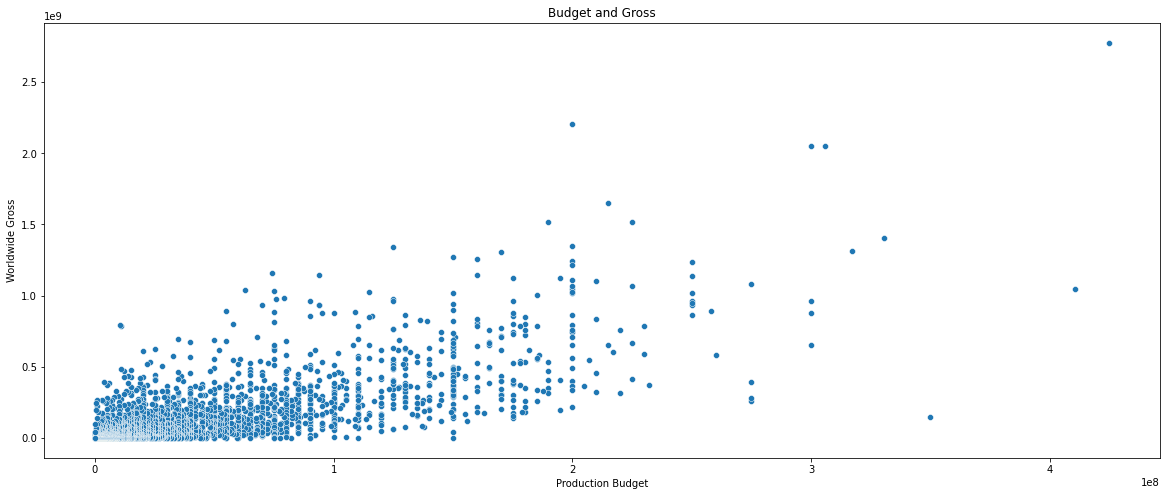

In [85]:
fig, ax = plt.subplots(figsize=(20,8))

sns.scatterplot(x=budgets['production_budget'], y=budgets['worldwide_gross'])

ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Budget and Gross');

In [86]:
budgets['worldwide_gross'].values

array([2776345279, 1045663875,  149762350, ...,       1338,          0,
           181041], dtype=int64)

In [87]:
result = stats.ttest_ind(budgets['production_budget'].values, budgets['worldwide_gross'].values, equal_var=True)

In [88]:
result

Ttest_indResult(statistic=-25.352947586831252, pvalue=4.7264202307731374e-138)

This is a tiny p-value. We can reject the null hypothesis and assume there is a less than .1% chance that a statistic at least this large would occur if no correlation between production budget and worldwide gross existed.

In [89]:
cd ..

C:\Users\Jackson\Documents\flatiron\dsc-phase-2-project-v3\data


In [90]:
ls

 Volume in drive C is OS
 Volume Serial Number is 8EF7-A13E

 Directory of C:\Users\Jackson\Documents\flatiron\dsc-phase-2-project-v3\data

09/11/2023  02:07 PM    <DIR>          .
09/11/2023  03:30 PM    <DIR>          ..
09/11/2023  11:26 AM            53,544 bom.movie_gross.csv.gz
09/11/2023  11:45 AM    <DIR>          im.db
09/11/2023  11:28 AM        67,149,708 im.db.zip
09/11/2023  02:02 PM         6,102,441 Movie_Data_w_Yasitha_Ratings.xlsx
09/11/2023  11:29 AM           498,202 rt.movie_info.tsv.gz
09/11/2023  11:29 AM         3,402,194 rt.reviews.tsv.gz
09/11/2023  11:30 AM           827,840 tmdb.movies.csv.gz
09/11/2023  11:30 AM           153,218 tn.movie_budgets.csv.gz
               7 File(s)     78,187,147 bytes
               3 Dir(s)  32,507,801,600 bytes free


In [91]:
budgets_tmdb = budgets.merge(tmdb, left_on='movie', right_on='title', how='inner')

In [92]:
budgets_tmdb.sort_values(by='popularity', ascending=False).head(30)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
880,6,"Oct 24, 2014",John Wick,30000000,43037835,76235001,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
17,22,"Dec 17, 2014",The Hobbit: The Battle of the Five Armies,250000000,255119788,945577621,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
20,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
21,35,"Aug 14, 1998",The Avengers,60000000,23385416,48585416,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
99,14,"Aug 1, 2014",Guardians of the Galaxy,170000000,333172112,770867516,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
73,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
74,80,"Oct 6, 2017",Blade Runner 2049,185000000,92054159,259357408,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
54,60,"Nov 16, 2018",Fantastic Beasts: The Crimes of Grindelwald,200000000,159555901,652220086,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
91,99,"Jul 7, 2017",Spider-Man: Homecoming,175000000,334201140,880166350,20618,"[28, 12, 878, 18]",315635,en,Spider-Man: Homecoming,46.775,2017-07-07,Spider-Man: Homecoming,7.4,11585


In [93]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""", imdbconn)

In [94]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [95]:
pd.read_sql("""
SELECT *
FROM directors
""", imdbconn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [96]:
pd.read_sql("""
SELECT *
FROM known_for
""", imdbconn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [97]:
pd.read_sql("""
SELECT *
FROM movie_akas
""", imdbconn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [98]:
pd.read_sql("""
SELECT *
FROM movie_ratings
""", imdbconn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [99]:
pd.read_sql("""
SELECT *
FROM persons
""", imdbconn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [100]:
pd.read_sql("""
SELECT *
FROM principals
""", imdbconn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [101]:
pd.read_sql("""
SELECT *
FROM writers
""", imdbconn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [102]:
merged_basics_and_budgets = budgets.merge(movie_basics, left_on='movie', right_on='primary_title', how='left')

In [103]:
merged_basics_and_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"
7217,79,"Apr 2, 1999",Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN,NaN
7218,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN,NaN
7219,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller"


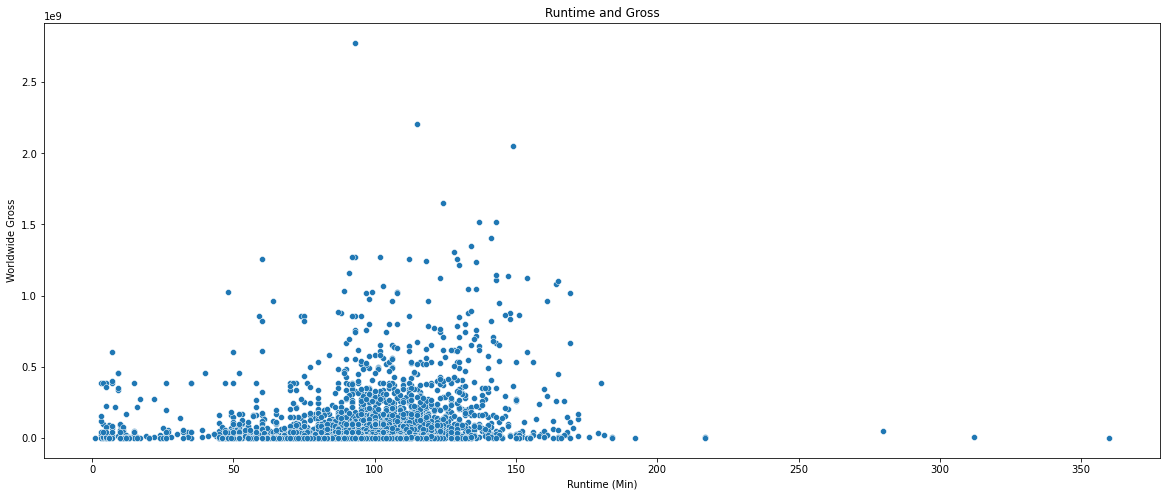

In [104]:
fig, ax = plt.subplots(figsize=(20,8))

sns.scatterplot(x=merged_basics_and_budgets['runtime_minutes'], y=merged_basics_and_budgets['worldwide_gross'])

ax.set_xlabel('Runtime (Min)')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Runtime and Gross');

In [105]:
merged_basics_and_budgets['genres'].value_counts().head(20)

Drama                         497
Documentary                   290
Comedy                        140
Comedy,Drama                  104
Horror                         95
Drama,Romance                  89
Comedy,Drama,Romance           84
Thriller                       81
Adventure,Animation,Comedy     73
Action,Crime,Drama             63
Drama,Thriller                 63
Comedy,Romance                 59
Action,Adventure,Sci-Fi        58
Horror,Thriller                56
Horror,Mystery,Thriller        47
Action                         46
Action,Adventure,Fantasy       41
Crime,Drama,Thriller           39
Action,Comedy,Crime            37
Action,Adventure,Drama         34
Name: genres, dtype: int64

In [106]:
genres_groupby_mean = merged_basics_and_budgets.groupby('genres').mean()

In [107]:
merged_basics_and_budgets.loc[merged_basics_and_budgets['id'] == 56]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
62,56,"May 2, 2014",The Amazing Spider-Man 2,200000000,202853933,708996336,tt1872181,The Amazing Spider-Man 2,The Amazing Spider-Man 2,2014.0,142.0,"Action,Adventure,Sci-Fi"
180,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,tt1323045,Frozen,Frozen,2010.0,93.0,"Adventure,Drama,Sport"
181,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,tt1611845,Frozen,Wai nei chung ching,2010.0,92.0,"Fantasy,Romance"
182,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,tt2294629,Frozen,Frozen,2013.0,102.0,"Adventure,Animation,Comedy"
311,56,"Feb 22, 2019",How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,tt2386490,How to Train Your Dragon: The Hidden World,How to Train Your Dragon: The Hidden World,2019.0,104.0,"Action,Adventure,Animation"
...,...,...,...,...,...,...,...,...,...,...,...,...
6658,56,"Aug 11, 2009",London to Brighton,825000,0,610776,NaN,NaN,NaN,NaN,NaN,NaN
6791,56,"Jan 1, 1991",Johnny Suede,500000,55000,55000,NaN,NaN,NaN,NaN,NaN,NaN
6950,56,"May 6, 2005",Fighting Tommy Riley,300000,10514,10514,NaN,NaN,NaN,NaN,NaN,NaN
7078,56,"Jan 1, 1971",Sweet Sweetback's Baad Asssss Song,150000,15200000,15200000,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
duplicates = merged_basics_and_budgets[merged_basics_and_budgets.duplicated()]
print(len(duplicates))

0


In [112]:
top_5_genres = genres_groupby_mean.sort_values(by='worldwide_gross', ascending=False).head(5)
top_5_genres['worldwide_gross'] = top_5_genres['worldwide_gross'].astype(int)
top_5_genres

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
genres,,,,,,
"Adventure,Drama,Sport",56.000000,1.500000e+08,4.007380e+08,1272469910,2010.000000,93.000000
"Fantasy,Romance",56.000000,1.500000e+08,4.007380e+08,1272469910,2010.000000,92.000000
"Family,Fantasy,Musical",60.500000,9.000000e+07,4.400357e+08,933815419,2017.500000,94.500000
"Adventure,Fantasy",36.333333,2.316667e+08,1.928914e+08,701210693,2013.333333,139.666667
"Action,Adventure,Sci-Fi",48.758621,1.606103e+08,2.203234e+08,599130207,2014.500000,126.862069


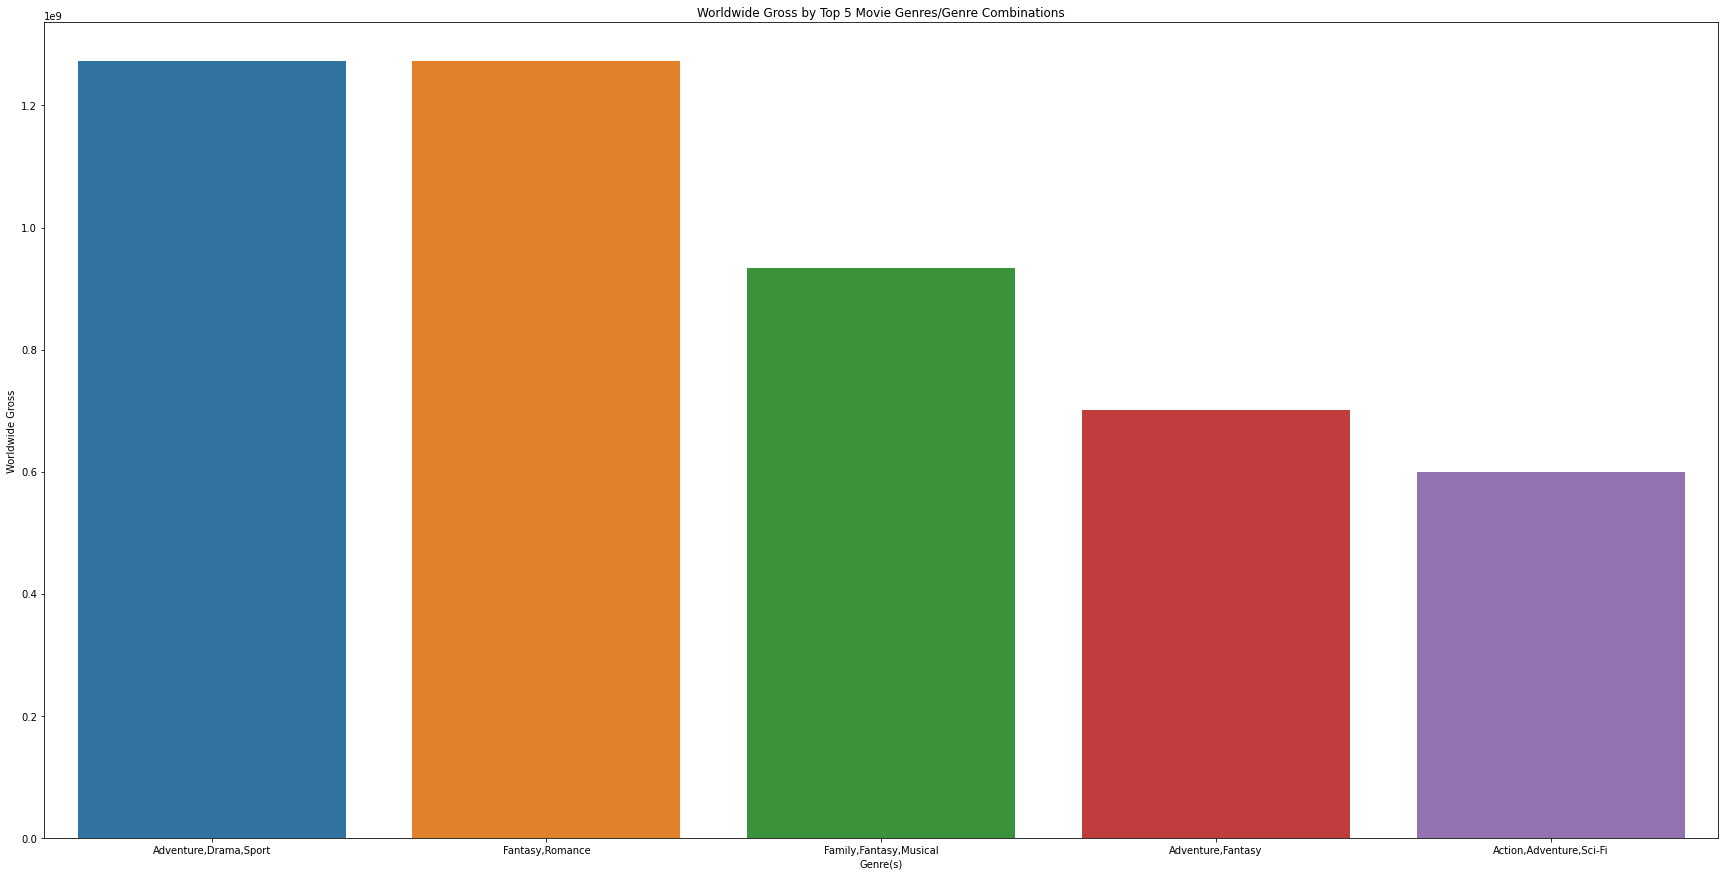

In [113]:
fig, ax = plt.subplots(figsize=(30,15))

sns.barplot(x=top_5_genres.index, y=top_5_genres['worldwide_gross'])

ax.set_title('Worldwide Gross by Top 5 Movie Genres/Genre Combinations')
ax.set_xlabel('Genre(s)')
ax.set_ylabel('Worldwide Gross');

In [114]:
merged_basics_and_budgets['release_date'] = pd.to_datetime(merged_basics_and_budgets['release_date'])

In [115]:
merged_basics_and_budgets['month_release'] = merged_basics_and_budgets['release_date'].dt.month

In [116]:
merged_basics_and_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,month_release
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,78,2018-12-31,Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",12
7217,79,1999-04-02,Following,6000,48482,240495,NaN,NaN,NaN,NaN,NaN,NaN,4
7218,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,NaN,NaN,7
7219,81,2015-09-29,A Plague So Pleasant,1400,0,0,tt2107644,A Plague So Pleasant,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller",9


In [117]:
release_month_means = merged_basics_and_budgets.groupby('month_release').mean()
release_month_means

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
month_release,,,,,,
1,51.339450,2.023797e+07,2.564825e+07,4.944436e+07,2014.367089,98.577465
2,50.556000,2.696911e+07,3.433443e+07,6.842929e+07,2014.577778,96.206140
3,48.845771,3.555415e+07,4.516392e+07,9.808654e+07,2014.338323,93.174061
4,49.415282,2.389582e+07,2.534368e+07,5.734470e+07,2014.335227,94.145215
5,50.124748,4.383265e+07,6.039423e+07,1.446728e+08,2014.180000,100.354260
6,52.422951,4.106669e+07,6.114686e+07,1.324797e+08,2014.185535,94.785455
7,50.733591,3.951422e+07,5.608985e+07,1.313219e+08,2014.011628,98.474790
8,53.089109,2.401390e+07,2.936755e+07,5.586118e+07,2014.125828,94.869403
9,48.365696,2.211530e+07,2.219099e+07,4.422979e+07,2014.119403,97.199301


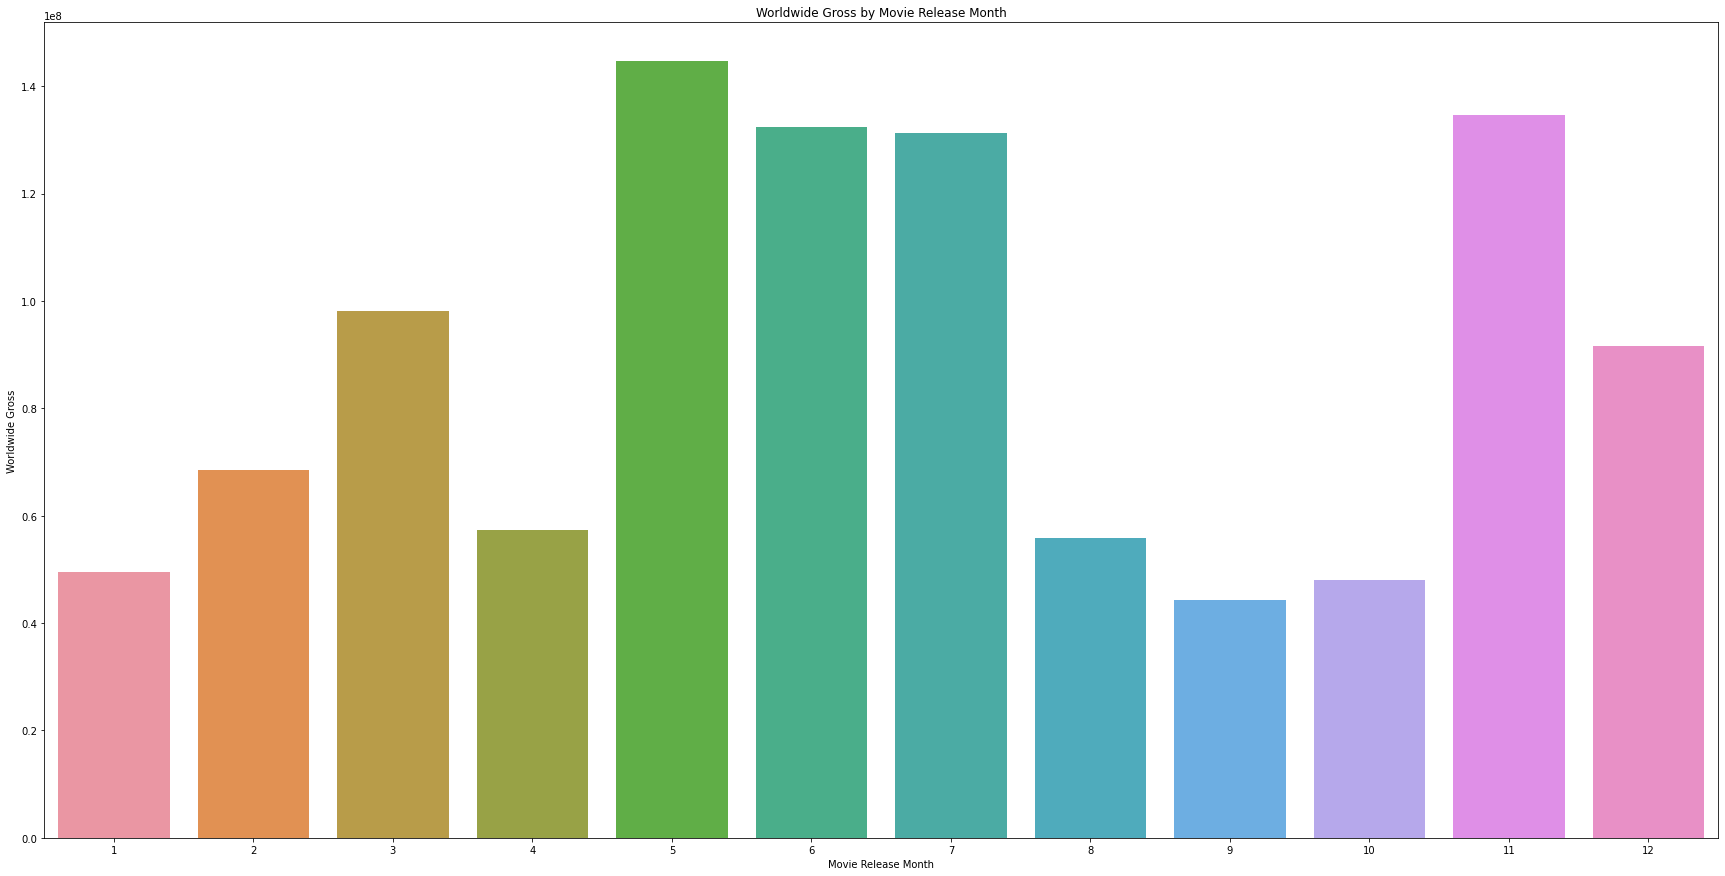

In [118]:
fig, ax = plt.subplots(figsize=(30,15))

sns.barplot(x=release_month_means.index, y=release_month_means['worldwide_gross'])

ax.set_title('Worldwide Gross by Movie Release Month')
ax.set_xlabel('Movie Release Month')
ax.set_ylabel('Worldwide Gross');